# Threat Search Policy


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from domoku.tools import GomokuTools as Gt
from domoku.policies.threat_search import ThreatSearchPolicy
from domoku.board import GomokuBoard as LegacyBoard
from alphazero.gomoku_board import GomokuBoard
from domoku.policies.maximal_criticality import MaxCriticalityPolicy
from domoku.policies.softadvice import MaxInfluencePolicy, MaxInfluencePolicyParams
from domoku.constants import BLACK

In [3]:
SIZE=15

In [173]:
threat_model = ThreatSearchPolicy(board_size=SIZE)
hard_policy = MaxCriticalityPolicy(board_size=SIZE)
params = MaxInfluencePolicyParams(
    board_size=SIZE,
    sigma=.4,
    iota=20,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
policy = MaxInfluencePolicy(params, criticality_model=hard_policy, threat_model=threat_model, pov=BLACK)

/Users/wgiersche/.local/share/virtualenvs/DeepGomoku-cXtJ_EtM/lib/python3.10/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [174]:
white_wins = 'c11f9e9g8f7g7g9h8'  # from Yixin vs Wolfie
examine = 'D7K7D10K10F7M11'

In [175]:
stones = Gt.string_to_stones(white_wins)

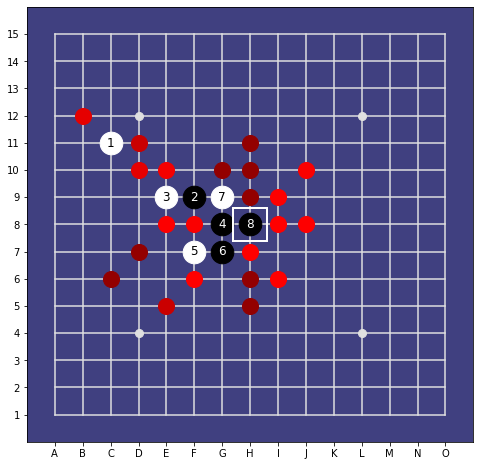

In [177]:
board_t = LegacyBoard(n=SIZE, disp_width=8, stones=stones, heuristics=threat_model)
board_t.display()

In [8]:
board = GomokuBoard(SIZE, white_wins, x_means='b')
board.print_pi(threat_model)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 844   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 698   0   0   0 444   0   0   0   0   0   0   0]
 [  0   0   0 844 938   0 444 444   0 972   0   0   0   0   0]
 [  0   0   0   0   0   0   0 444 998   0   0   0   0   0   0]
 [  0   0   0   0 991 972   0   0 999 998   0   0   0   0   0]
 [  0   0   0 444   0   0   0 998   0   0   0   0   0   0   0]
 [  0   0 444   0   0 994   0 444 998   0   0   0   0   0   0]
 [  0   0   0   0 698   0   0 444   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


---

In [9]:
res = soft_policy(board.math_rep, verbose=1, stone=board.Stone);

Critical:  B12 - 1.0, w=0.5
Threats:   I8 - 2.0, w=1.0
Influence: I8 - 7.4263, w=0.1
Total:     I8 - 3.2426


In [10]:
soft_policy.sample(board.math_rep, 1, board.Stone)

[I8]

# A Complete Game!

The mixed policy puts stones next to each other until it recoginizes a double-open 3 and then finishes the game.
With this policy, we're able to create loads of short, yet somewhat meaningful trajectories for training.

In [11]:
SIZE = 15

In [13]:
threat_model = ThreatSearchPolicy(board_size=SIZE)
hard_policy = MaxCriticalityPolicy(board_size=SIZE)
params = MaxInfluencePolicyParams(
    board_size=SIZE,
    sigma=.7,
    iota=20,
    radial_constr = [.0625, .125, .25, .5],
    radial_obstr = [-.0625, -.125, -.25, -.5]
)
soft_policy = MaxInfluencePolicy(params, criticality_model=hard_policy, threat_model=threat_model, pov=BLACK)

In [80]:
board = GomokuBoard(SIZE, stones=white_wins)
sample = board.math_rep.copy()

In [161]:
move = soft_policy.sample(sample, 1, stone=board.Stone)[0]
board.act(move)
sample = board.math_rep
winner = hard_policy.get_winner(sample)
board.plot()
if winner is not None:
    print("**********************************************************")
    print("")
    print(f"                      TERMINATED")
    print("")
    print("**********************************************************")
print("")
print(f"Board: {board}")
soft_policy(board.math_rep, verbose=1, stone=board.Stone);

                                                     
15    .  .  .  .  .  O  .  .  .  .  .  .  .  .  .    
14    .  .  .  O  X  X  .  .  .  .  .  .  .  .  .    
13    .  .  O  .  O  X  O  .  .  .  .  .  .  .  .    
12    .  O  .  X  O  X  X  X  .  O  X  .  .  .  .    
11    .  .  X  X  O  X  X  .  X  O  .  .  .  .  .    
10    .  .  X  X  O  O  .  X  O  X  .  .  .  .  .    
 9    .  .  X  O  X  O  X  O  O  X  O  .  .  .  .    
 8    .  .  O  O  X  O  O  O  O  X  .  .  .  .  .    
 7    .  X  O  X  X  X  O  O  O  O  X  .  .  O  .    
 6    X  .  .  .  O  X  X  .  X  O  X  O [X] .  .    
 5    .  .  .  X  X  O  X  X  .  O  X  O  .  .  .    
 4    .  .  .  .  O  O  X  O  O  X  O  X  .  .  .    
 3    .  .  .  .  .  O  .  .  .  O  .  .  .  .  .    
 2    .  .  .  .  X  .  O  .  X  .  .  .  .  .  .    
 1    .  .  .  .  .  X  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O

Board: C11 F9 E9 G8 F7 G7 G9 H8

In [172]:
print(set(soft_policy.sample(sample, 20, stone=board.Stone)))

{H11, A4, M9, M11, O2, K10, L10, C5, M12, G3, H3, E7, I5}
